# Кластеризация 2025

**Цель работы:** изучение алгоритмов и методов кластеризации на практике.

## Часть 1

### 1. Создание набора данных

В начале работы необходимо использовать функцию создания набора данных для генерации датафрейма. Количество элементов выбрано 96, т.к. это число делится на 2, 3 и 4 и удовлетворяет условиям задачи кластеризации.

In [24]:
import numpy as np
import pandas as pd

def make_data(n, seed):
    np.random.seed(seed)
    shift_matrix = np.array([[3, 3], [6, 9], [9, 3]])
    data = np.random.randn(3, 2, n) + shift_matrix.reshape((3, 2, 1))
    data = np.swapaxes(data, 1, 2)
    data = data.reshape((-1, 2))
    data *= np.array([[20, 0.5]])
    df = pd.DataFrame({'x': data[:, 0], 'y': data[:, 1]},
    columns=['x', 'y'])
    df = df.sample(frac=1.0)
    return df

n_: int = 96
seed_: int = 1
main_df = make_data(n_, seed_)
main_df.head()

,x,y
172,125.529986,4.381782
43,93.849092,1.523284
217,202.083487,1.594647
266,167.493160,1.428402
256,172.303355,0.386444


### 2. Стандартизация данных

Для стандартизации данных следует применить `StandartScaler`, чтобы привести данные к виду стандартного нормального распределения, что позволяет минимизировать среднеквадратичную ошибку. Чтобы применить стандартизацию к набору можно применить функцию `fit_transform()`, чтобы одновременно обучить стандартизатор и преобразовать данные.

In [25]:
from sklearn.preprocessing import StandardScaler

x = main_df[['x']]
y = main_df['y']

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

### 3. Обучение модели

В данной работе в качестве модели будет использовать `KMeans`, как один из наиболее простых и широко используемых методов кластеризации (Алгоритм K-средних). Здесь также применяется метод, который одновременно обучает модель и возвращает метки набора обучающих данных `fit_predict()`.

In [26]:
from sklearn.cluster import KMeans

kmeans_3 = KMeans(n_clusters=3, random_state=0)
predicted_kmeans_3 = kmeans_3.fit_predict(x_scaled)
predicted_kmeans_3

array([0, 0, 2, 2, 2, 1, 2, 2, 0, 1, 0, 2, 0, 0, 0, 2, 1, 1, 1, 1, 0, 0,
       2, 0, 2, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 1, 2,
       2, 1, 0, 2, 2, 0, 2, 0, 1, 0, 2, 1, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2,
       1, 1, 0, 1, 1, 2, 2, 0, 1, 2, 0, 1, 0, 2, 2, 1, 0, 1, 2, 0, 2, 0,
       2, 1, 0, 1, 1, 0, 1, 1, 0, 1, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 1, 2,
       2, 0, 0, 2, 1, 0, 0, 2, 2, 1, 0, 0, 0, 2, 2, 2, 0, 0, 1, 2, 1, 0,
       1, 2, 1, 0, 2, 2, 1, 1, 1, 1, 0, 1, 1, 2, 0, 0, 0, 1, 0, 2, 0, 2,
       0, 1, 2, 1, 2, 2, 1, 0, 0, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 2, 1, 1,
       2, 2, 1, 1, 2, 1, 0, 1, 2, 2, 1, 0, 0, 1, 0, 0, 1, 2, 0, 1, 1, 1,
       0, 0, 0, 0, 2, 0, 1, 0, 2, 0, 1, 1, 1, 1, 2, 0, 2, 1, 1, 2, 0, 0,
       1, 2, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 2, 2, 0, 0, 1, 2, 0, 1, 2,
       2, 2, 1, 2, 2, 0, 2, 1, 1, 2, 1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 0,
       1, 1, 0, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 0, 1, 2, 2, 2, 0, 0,
       0, 2], dtype=int32)

### 4. Визуализация

Далее следует провести визуализацию кластеров с помощью `scatter`. При этом нужно пометить центроиды кластеров и покрасить кластеры разными цветами. 

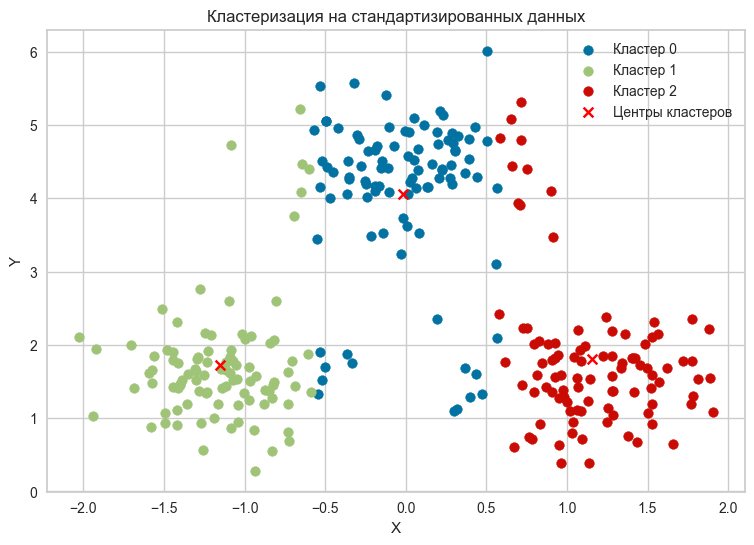

In [27]:
import matplotlib.pyplot as plt

def visual_kmeans_scatter(clusters, k_means, n, x=x_scaled):
    plt.figure(figsize=(9, 6))
    plt.title('Кластеризация на стандартизированных данных')
    plt.xlabel('X')
    plt.ylabel('Y')

    for cluster in range(n):
        mask = clusters == cluster
        plt.scatter(x[mask], y[mask], label=f"Кластер {cluster}")

    df_temp = pd.DataFrame({'y': y, 'cluster': clusters})
    y_centers = df_temp.groupby('cluster')['y'].mean().tolist()
    x_centers = k_means.cluster_centers_
    plt.scatter(x_centers[:], y_centers[:], c="red", marker='x', label="Центры кластеров")

    plt.legend()

visual_kmeans_scatter(predicted_kmeans_3, kmeans_3, 3)

На графике видно три кластера, которые в целом хорошо разделены, но не идеально. Каждый кластер имеет компактное ядро с чёткими границами, однако присутствуют и проблемные области. В частности, заметны отдельные точки-выбросы, которые находятся на относительно близком расстоянии от соседних кластеров.

Особенно это заметно в зонах соприкосновения кластеров: несколько точек расположены так, что могли бы с почти равной вероятностью принадлежать разным группам. Эти выбросы создают небольшие "мостики" между кластерами, нарушая идеальную разделимость. Центроиды расположены корректно внутри своих групп, но наличие таких пограничных точек указывает на некоторую неоднородность данных.

Общее качество кластеризации положительное — алгоритм справился с основной структурой. Однако наличие выбросов рядом с границами означает, что реальное разделение не абсолютное.

### 5. Коэффициент силуэта

Для подсчета коэффициента силуэта используется метод `silhouette_score`. Коэффициент силуэта показывает, насколько точно каждый объект соответствует своему кластеру и насколько он отличается от других кластеров.

In [28]:
from sklearn.metrics import silhouette_score

silhouette_val3 = silhouette_score(x_scaled, predicted_kmeans_3)
print("Silhouette Score (KMeans 3):", silhouette_val3)

Silhouette Score (KMeans 3): 0.6040574799887194


Данное значение коэффициента  силуэта свидетельствует о том, что кластеризация имеет хорошее качество, и что кластеры различимы, но есть перекрытие.

### 6. Повторение для кластеров 2 и 4

Теперь необходимо повторить предыдущие пункты работы с кластеризацией для количества кластеров `n = 2` и `n = 4`. Для визуализации достаточно использовать ранее написанный метод с параметрами моделей.

Silhouette Score (KMeans 2): 0.6244688879292126


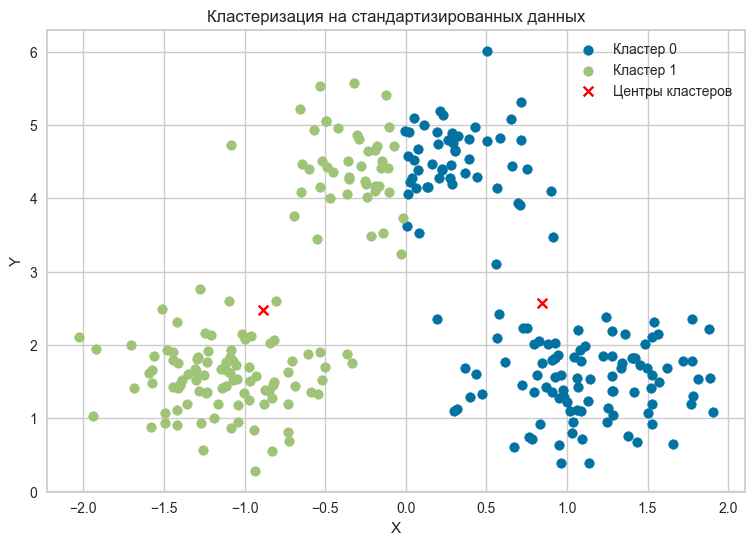

In [29]:
n = 2
kmeans_2 = KMeans(n_clusters=n, random_state=0)
predicted_kmeans_2 = kmeans_2.fit_predict(x_scaled)

visual_kmeans_scatter(predicted_kmeans_2, kmeans_2, n)

silhouette_val2 = silhouette_score(x_scaled, predicted_kmeans_2)
print(f"Silhouette Score (KMeans {n}):", silhouette_val2)

На графике представлены два чётко разделённых кластера, которые образуют две выраженные группы данных. Кластеры расположены симметрично относительно центра координат: один сосредоточен в области отрицательных значений (примерно -1.5 до -0.5), другой — в положительных (0.5 до 1.5).

Оба кластера демонстрируют высокую компактность — точки тесно сгруппированы вокруг своих центроидов. Красные крестики центров расположены примерно на отметках -1.0 и 1.0, что оптимально соответствует распределению данных. Между кластерами сохраняется заметный промежуток, где точек практически нет, что обеспечивает хорошую разделимость.

При этом видно, что вблизи нулевой отметки присутствует несколько точек, которые находятся примерно на равном расстоянии от обоих центроидов. Эти пограничные наблюдения создают небольшую зону неопределённости. Однако в целом разделение выглядит логичным и эффективным — алгоритм успешно выявил две естественные группы в стандартизированных данных.


Также повторим для 4-ых кластеров.

Silhouette Score (KMeans 4): 0.548934505985606


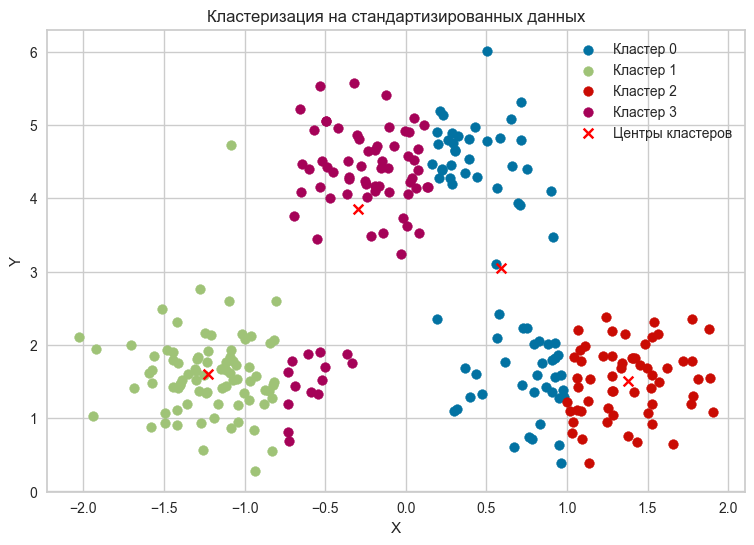

In [30]:
n = 4
kmeans_4 = KMeans(n_clusters=n, random_state=0)
predicted_kmeans_4 = kmeans_4.fit_predict(x_scaled)

visual_kmeans_scatter(predicted_kmeans_4, kmeans_4, n)

silhouette_val4 = silhouette_score(x_scaled, predicted_kmeans_4)
print(f"Silhouette Score (KMeans {n}):", silhouette_val4)

На графике представлено разделение данных на четыре кластера. Визуально видно, что алгоритм пытался выделить больше групп, чем это естественно для структуры данных. Два основных скопления, которые были очевидны при кластеризации на 2 и 3 кластера, здесь искусственно разделены на более мелкие части.

Центроиды расположены близко друг к другу, особенно в областях с высокой плотностью точек. Это создаёт впечатление избыточности — границы между некоторыми соседними кластерами практически неразличимы. Например, в области положительных значений два кластера сливаются в одно облако точек без чёткой разделительной линии.

Особенно проблемной выглядит центральная часть графика, где точки разных кластеров активно перемешаны. Алгоритм провёл разделительные линии внутри изначально цельных групп, что привело к созданию кластеров с низкой внутренней компактностью и слабой обособленностью. Такое разбиение выглядит надуманным и не отражает реальной структуры данных.

### Выводы

Кластеризация на два кластера показала наилучшее качество с коэффициентом силуэта 0.6244. Это подтверждает, что разделение на две группы является наиболее естественным для данных. Два компактных кластера чётко соответствуют основным скоплениям точек, разделённым заметным промежутком. Центроиды оптимально расположены, а пограничные точки минимальны — такая структура обеспечивает максимальную разделимость.

Трёхкластерная модель с силуэтом 0.6040 демонстрирует немного худшее качество. Появление третьего кластера в центральной зоне, состоящего из переходных точек, снижает общую компактность групп. Хотя визуально разделение остаётся различимым, метрика подтверждает, что это разбиение менее обосновано, чем вариант с двумя кластерами.

Четырёхкластерное разбиение с показателем 0.5489 явно проигрывает предыдущим вариантам. Силуэтный коэффициент заметно снизился, что подтверждает избыточность такого разделения. Алгоритм начинает дробить естественные скопления на произвольные части, создавая кластеры со слабыми внутренними связями и размытыми границами.

Силуэтные коэффициенты объективно подтверждают визуальные наблюдения. K=2 является оптимальным выбором с максимальным значением 0.6244. Увеличение числа кластеров последовательно снижает качество сегментации: $K=3$ даёт 0.6040, а $K=4$ — лишь 0.5489. Данные имеют выраженную биполярную структуру, и попытки выделить больше кластеров не улучшают, а ухудшают результаты кластеризации.

### 7. График по "методу локтя"

С помощью библиотеки `yellowbrick` построен график по "методу локтя" для кластеризации 3.

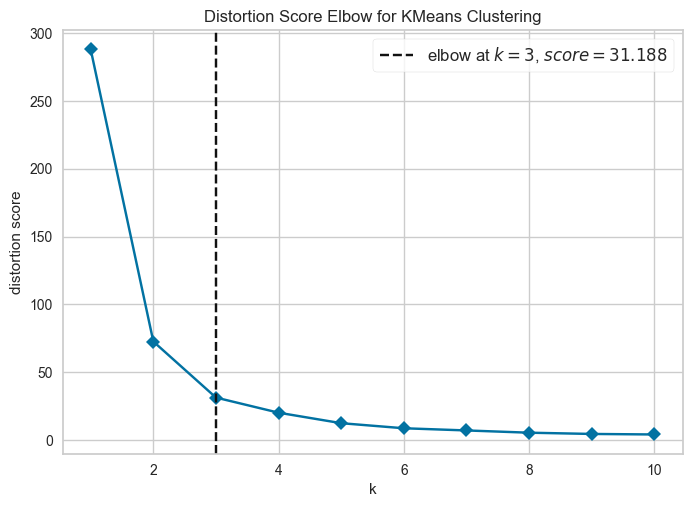

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [31]:
from yellowbrick.cluster import KElbowVisualizer

visualizer = KElbowVisualizer(kmeans_3, k=(1,11), timings=False)
visualizer.fit(x_scaled)
visualizer.show()

График отображает динамику ошибки кластеризации в зависимости от числа кластеров. Кривая демонстрирует классический паттерн: резкое снижение ошибки на начальном этапе с последующим постепенным выходом на плато.

Явный "локоть" наблюдается при $k=3$ с значением ошибки 31.188. Это точка, где дальнейшее увеличение числа кластеров перестаёт давать существенное улучшение качества. До трёх кластеров каждый дополнительный центр значительно уменьшает суммарное расстояние точек до центроидов, что видно по крутому наклону кривой.

После трёх кластеров кривая резко сглаживается. Разница между ошибкой для $k=3$ и $k=4$ уже незначительна, а начиная с $k=5$ уменьшение становится минимальным. Это указывает на то, что дополнительные кластеры лишь незначительно улучшают описание данных, при этом усложняя модель.


## Часть 2

### 1. Чтение и обработка файла

**Набор данных:** `bank_loan_default.csv`

Данные о кредитах:
- age — возраст заёмщика (лет), числовой.
- annual_income — годовой доход, USD/год, числовой (широкий диапазон).
- employment_type — тип занятости: Salaried / Self-Employed / Unemployed, категориальный.
- education — образование: HS / Bachelors / Masters / PhD, категориальный.
- loan_amount — сумма кредита, USD, числовой (широкий диапазон).
- interest_rate_pct — процентная ставка по кредиту, % годовых, числовой.
- term_months — срок кредита, месяцев (набор фиксированных значений: 24/36/48/60/72), числовой/категориальный.
- credit_score — кредитный скор (от 300 до 850), числовой.
- num_open_accounts — число открытых кредитных счетов, целочисленный счётчик.
- delinquency_30d — просрочка платежа 30 дней: Yes / No, категориальный.
- residence_type — жильё: Own / Rent / Mortgage, категориальный.
- **Default — целевой класс: 1 — дефолт по кредиту, 0 — нет.**

In [32]:
bank_df = pd.read_csv('bank_loan_default.csv', sep=',')
bank_df.head()

,age,annual_income,employment_type,education,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,delinquency_30d,residence_type,Default
0,42,57272.0,Self-Employed,Masters,8516.0,5.85,48,730.0,10,No,Own,0
1,51,45786.0,Salaried,Masters,13760.0,9.97,36,677.0,7,No,Mortgage,0
2,69,42359.0,Salaried,Bachelors,2569.0,13.75,48,624.0,2,No,Own,0
3,65,50709.0,Self-Employed,Masters,13204.0,8.70,48,698.0,3,No,Rent,0
4,30,46272.0,Salaried,HS,7700.0,7.53,48,532.0,7,No,Rent,0


Как видно, некоторые данные можно привести к более 'выгодному' формату (например, перевести `annual_income` из float64 в int64). В качестве целевой переменной выбран атрибут `Default`, потому что в данных о наборе он указан, как *целевой класс*.

In [33]:
display(bank_df.info())
bank_df['annual_income'] = bank_df['annual_income'].astype('int64')
bank_df['loan_amount'] = bank_df['loan_amount'].astype('int64')
bank_df['credit_score'] = bank_df['credit_score'].astype('int64')
bank_df['delinquency_30d'] = bank_df['delinquency_30d'].replace({'Yes': True, 'No': False})
bank_df = bank_df.rename(columns={'Default': 'default'})
display(bank_df.head())

target = 'default'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3041 entries, 0 to 3040
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                3041 non-null   int64  
 1   annual_income      3041 non-null   float64
 2   employment_type    3041 non-null   object 
 3   education          3041 non-null   object 
 4   loan_amount        3041 non-null   float64
 5   interest_rate_pct  3041 non-null   float64
 6   term_months        3041 non-null   int64  
 7   credit_score       3041 non-null   float64
 8   num_open_accounts  3041 non-null   int64  
 9   delinquency_30d    3041 non-null   object 
 10  residence_type     3041 non-null   object 
 11  Default            3041 non-null   int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 285.2+ KB


None

C:\Users\maksi\AppData\Local\Temp\ipykernel_1132\2101545433.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  bank_df['delinquency_30d'] = bank_df['delinquency_30d'].replace({'Yes': True, 'No': False})


,age,annual_income,employment_type,education,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,delinquency_30d,residence_type,default
0,42,57272,Self-Employed,Masters,8516,5.85,48,730,10,False,Own,0
1,51,45786,Salaried,Masters,13760,9.97,36,677,7,False,Mortgage,0
2,69,42359,Salaried,Bachelors,2569,13.75,48,624,2,False,Own,0
3,65,50709,Self-Employed,Masters,13204,8.70,48,698,3,False,Rent,0
4,30,46272,Salaried,HS,7700,7.53,48,532,7,False,Rent,0


### 2. Визуализация

С помощью функции `select_dtypes()` получены все числовые столбцы и построена матрица диаграмма рассеяния средствами библиотеки `seaborn` (также следует указать целевую переменную в параметр `hue`, чтобы покрасить значения всех диаграмм в соответствие с распределением целевой переменной).

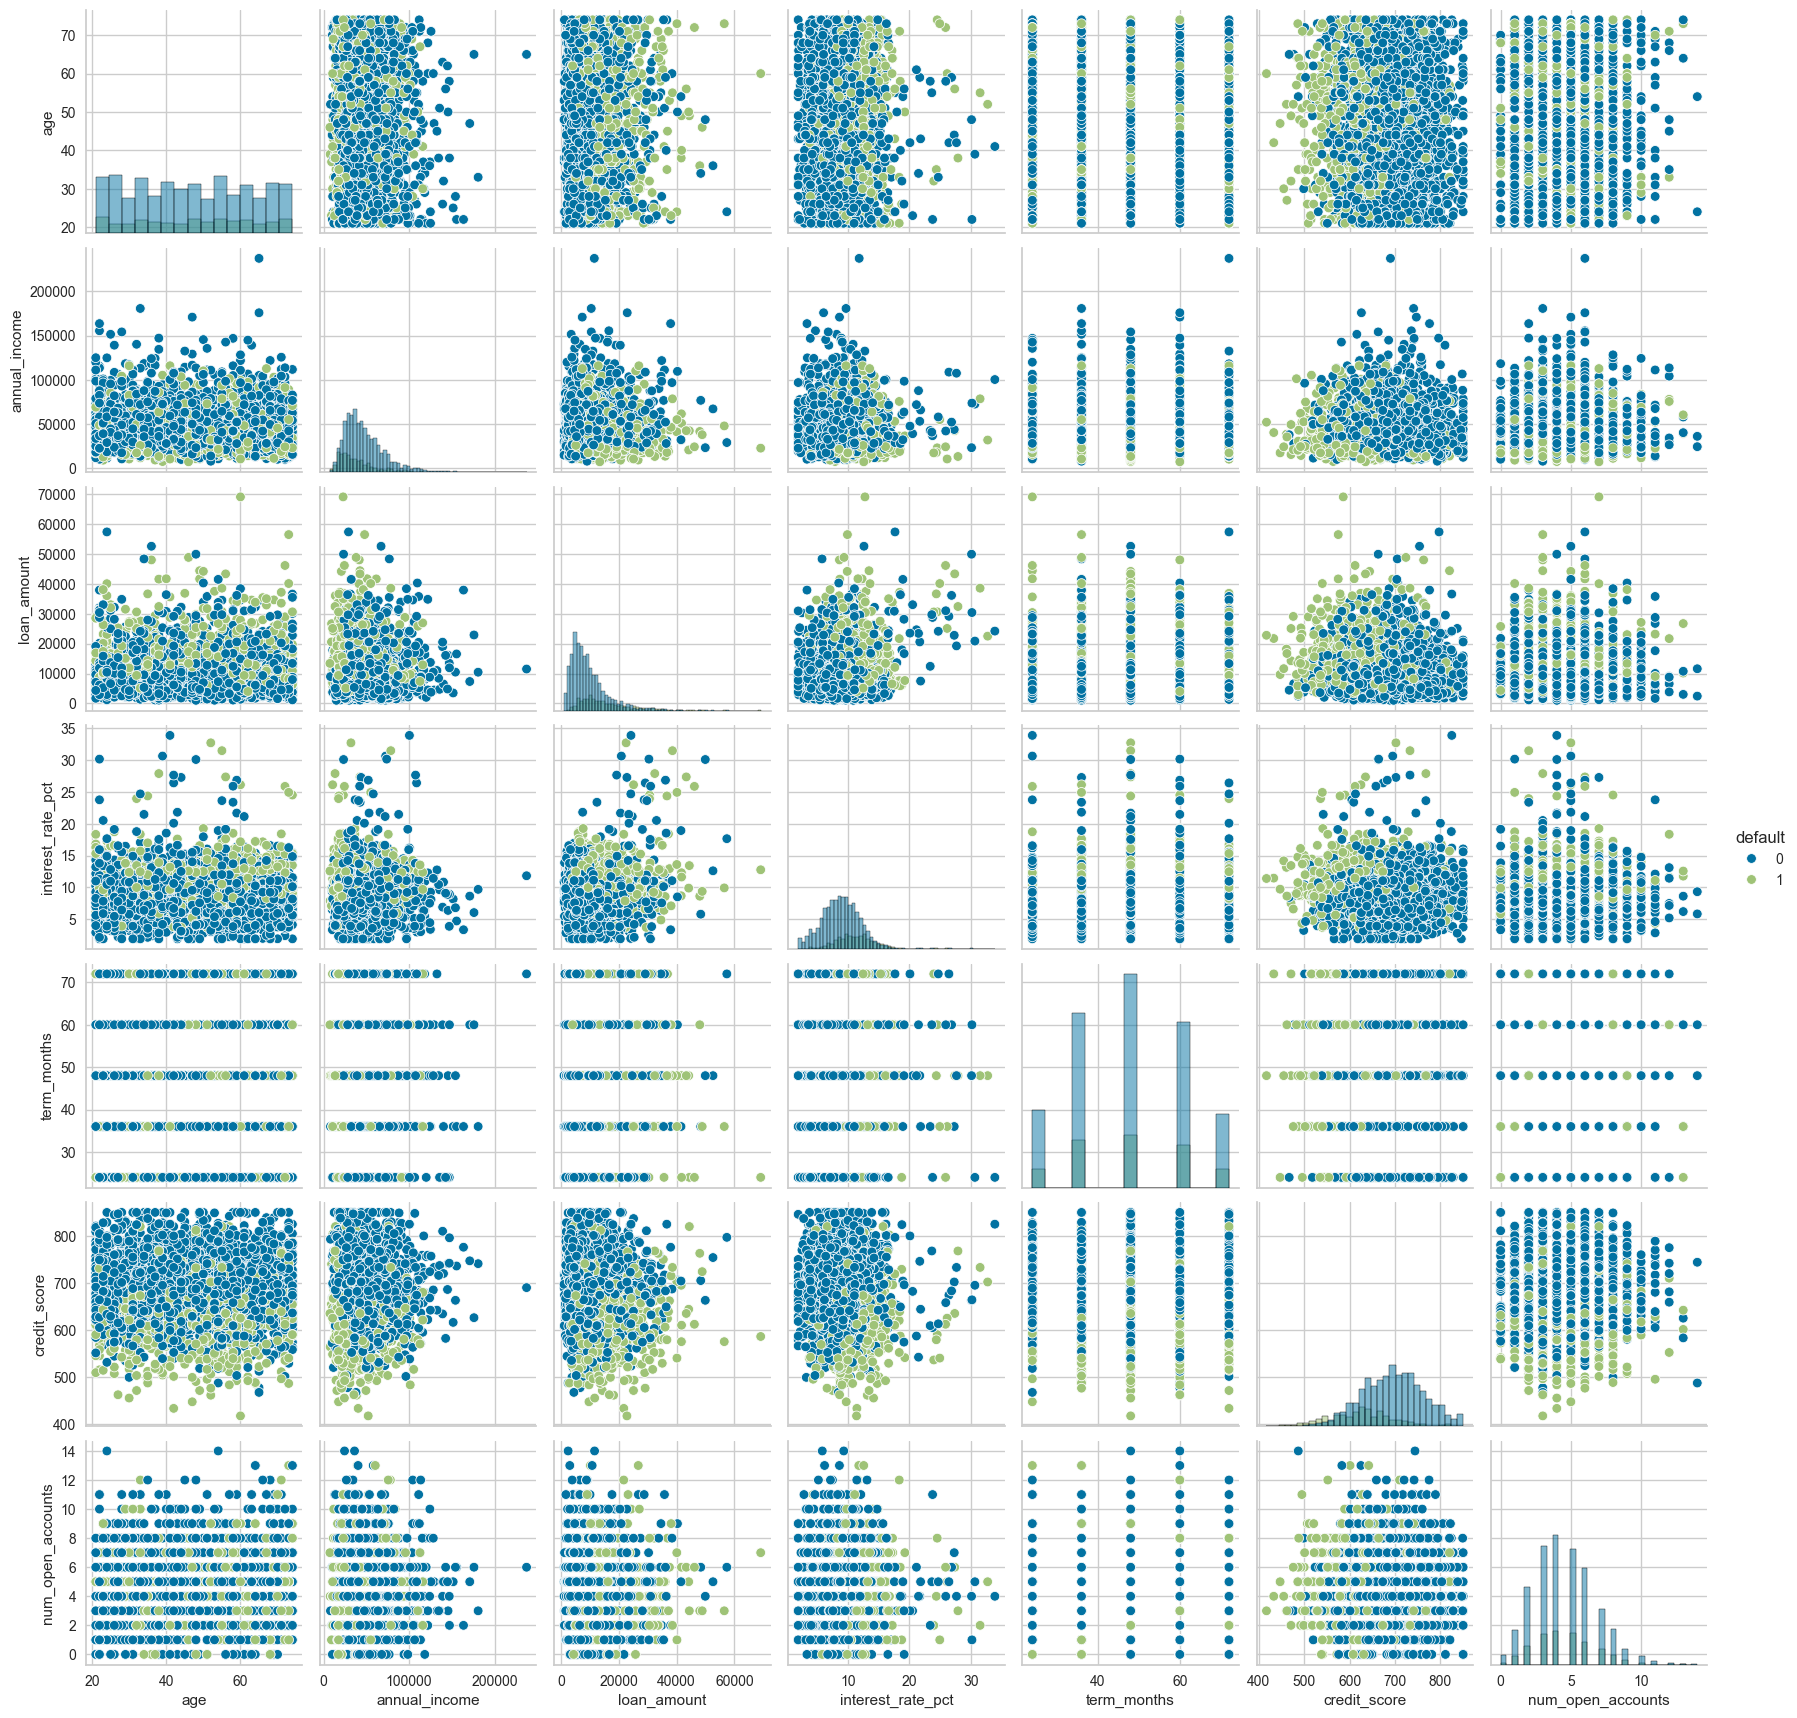

In [34]:
import seaborn as sns

num_cols = bank_df.select_dtypes(include=['int64', 'float64']).columns
bank_df_nums = bank_df[num_cols]
sns.pairplot(bank_df_nums, hue=target, diag_kind='hist')

На графиках матрицы видно, что практически в каждой ячейке распределение целевой переменной примерно равное, явного перевеса не наблюдается.

### 3. Обучение модели

Далее следует как раньше стандартизировать данные и обучить модель кластеризации. Также, перед этим создаются дамми-признаки для корректного обучения модели (перевод данных из категориального типа в числовой).

In [35]:
x_encoded = pd.get_dummies(
    bank_df,
    columns=["employment_type", "education", "delinquency_30d", "residence_type"],
    drop_first=True
)
x_num_bank = x_encoded.drop(target, axis=1)
y_bank = x_encoded[target]

bank_scaler = StandardScaler()
x_bank_scaled = bank_scaler.fit_transform(x_num_bank)

n_bank = 2
kmeans_bank = KMeans(n_clusters=n_bank, random_state=0)
predicted_kmeans_bank = kmeans_bank.fit_predict(x_bank_scaled)
predicted_kmeans_bank

array([1, 1, 0, ..., 1, 0, 0], shape=(3041,), dtype=int32)

Рассчитываем метрики качества модели (*ARI, AMI, FMI и т.д.*). Для расчета всех метрик, кроме коэффициента силуэта необходимо в качестве параметра указывать реальные значения целевой переменной.

In [36]:
from sklearn.metrics import adjusted_rand_score, adjusted_mutual_info_score, fowlkes_mallows_score, v_measure_score

y = bank_df[target]

def get_metrics(labels, pred, x=x_bank_scaled):
    print(f"Silhouette score: {silhouette_score(x, pred)}")
    print(f"ARI: {adjusted_rand_score(labels, pred)}")
    print(f"AMI: {adjusted_mutual_info_score(labels, pred)}")
    print(f"FMI: {fowlkes_mallows_score(labels, pred)}")
    print(f"V-Measure: {v_measure_score(labels, pred)}")

get_metrics(y, predicted_kmeans_bank)

Silhouette score: 0.09413191299632705
ARI: 0.0020117459738802405
AMI: -0.0002886410777571272
FMI: 0.6523932690404117
V-Measure: 2.100907281264736e-05


Исходя из приведённых метрик, можно сказать, что результаты кластеризации далеки от идеальных. Коэффициент силуэта равен примерно 0.09, что значительно ниже порога, который обычно говорит о хорошей разделимости кластеров (обычно от 0.3 и выше). Это указывает на то, что образованные кластеры либо пересекаются, либо объекты внутри них не очень похожи друг на друга.

`ARI` и `AMI` практически равны нулю, причём `AMI` даже чуть ниже нуля. Это говорит о том, что разбиение на кластеры практически не совпадает с истинными метками, и модель не смогла уловить какую-то информативную структуру в данных. Даже немного негативное значение `AMI` — это плохой признак, указывающий, что разбиение на кластеры ничуть не лучше случайного.

`V-measure` тоже очень низкая, практически нулевая, что говорит о плохой однородности и полноте кластеров: очень мало объектов одного истинного класса оказалось в своём кластере, а распределение по кластерам произошло фактически случайно.

На фоне остальных метрик `FMI` выглядит высоким — около 0.65, но этот показатель тоже может быть обманчивым, если кластеры большие или почти все элементы объединены в один или несколько кластеров. `FMI` нужно интерпретировать вместе с остальными метриками, и здесь он не способен "перетянуть" общий вывод.

В целом, можно сказать, что алгоритм кластеризации для этого набора данных оказался неэффективен — он либо не подходит к этим данным, либо сами данные не имеют чёткой кластерной структуры.

Далее, подсчитаны средние показатели по каждому признаку каждого кластера.

In [37]:
bank_df['cluster'] = predicted_kmeans_bank
cluster_means = bank_df.groupby('cluster')[num_cols].mean()
display(cluster_means)

,age,annual_income,loan_amount,interest_rate_pct,term_months,credit_score,num_open_accounts,default
cluster,,,,,,,,
0,46.944614,45121.748801,10552.061055,9.440474,47.717401,682.070214,4.540340,0.202791
1,47.530749,47660.390374,11085.628342,9.423388,47.631016,678.790107,4.562834,0.207219


Проведена кластеризация клиентской базы на 2 кластера с использованием алгоритма `KMeans`. Анализ выявил высокую степень схожести полученных сегментов по ключевым финансово-демографическим показателям. Существенные различия между кластерами отсутствуют, что свидетельствует о недостаточной дифференциации клиентской базы на основе анализируемых признаков.

Особенности кластеризации:
- *Минимальная дифференциация* — все анализируемые показатели отличаются менее чем на 5%, что ниже порога статистической значимости для сегментации.
- *Отсутствие паттернов риска* — уровень дефолтов практически идентичен в обоих кластерах, что исключает возможность разделения клиентов по критерию дефолта по кредиту.

Проведенная кластеризация не выявила значимых различий между выделенными группами клиентов — все ключевые показатели, включая доход, параметры кредитования и уровень риска, демонстрируют статистически незначимые расхождения. Полученные результаты указывают на неэффективность текущего набора признаков для содержательной сегментации и необходимость пересмотра методологии анализа либо включения дополнительных переменных для выделения качественно различных сегментов.

### 4. Кластеризация иерархическим агломеративным методом

В качестве дополнительной работы с кластерами требуется выполнить кластеризацию иерархическим агломеративным методом с помощью `AgglomerativeClustering`.

In [38]:
from sklearn.cluster import AgglomerativeClustering

bank_agglo = AgglomerativeClustering()
bank_agglo.fit(x_bank_scaled)
pred_agglo = bank_agglo.fit_predict(x_bank_scaled)
pred_agglo

array([0, 0, 0, ..., 0, 0, 0], shape=(3041,))

Далее, дендрограмма строится методами `dendrogram` и `linkage`.

Text(0.5, 1.0, 'Дендрограмма')

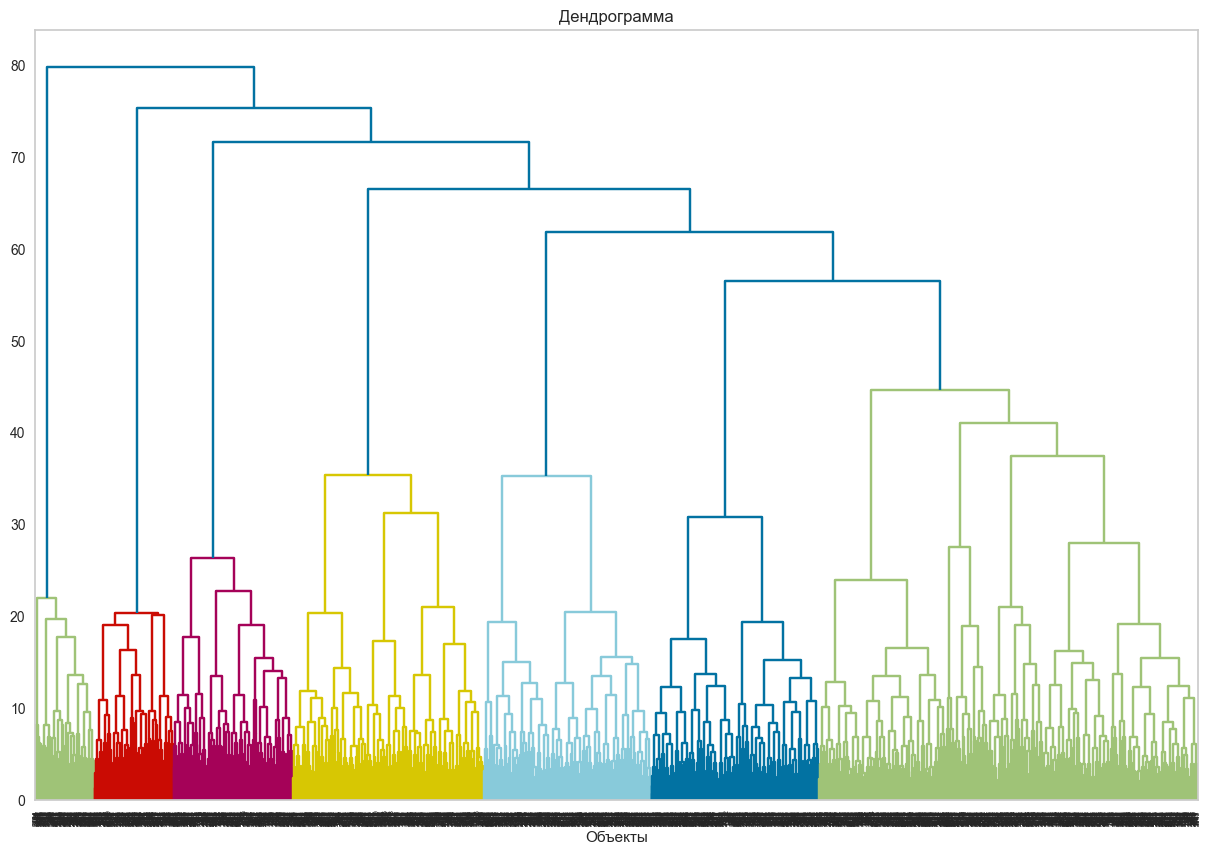

In [39]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

linked = linkage(x_bank_scaled, method = 'ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.grid(False)
plt.xlabel("Объекты")
plt.title('Дендрограмма')

Теперь, рассчитаем и проанализируем метрики для данной модели.

In [40]:
get_metrics(y, pred_agglo)

Silhouette score: 0.25126411722834
ARI: 0.008158580630019669
AMI: -0.0001367621713279836
FMI: 0.7825917119480117
V-Measure: 0.00033035624750900794


Оценка метрик показывает, что качество кластеризации остаётся невысоким — все показатели находятся на низком уровне. Тем не менее, текущий метод всё же работает лучше, чем алгоритм `KMeans` на этих же данных.

Для данного набора данных кластеризация в целом демонстрирует ограниченную эффективность. Если всё же требуется использовать кластеризацию, более разумным выбором будет применение иерархического подхода, который может оказаться более подходящим для структуры этих данных.

### Общие выводы

В ходе лабораторной работы были изучены методы кластеризации, включая алгоритм `KMeans` и агломеративную иерархическую кластеризацию. Для подбора оптимального числа кластеров применялся метод локтя.

Модели тестировались на данных о банковских клиентах, где в качестве целевой переменной выступал признак дефолта по кредиту (`default`).

Оценка качества кластеризации с использованием различных метрик показала, что ни один из рассмотренных методов не обеспечил эффективного разделения данных для предсказания целевого класса. Кластеризация оказалась слабо применима к данной задаче прогнозирования дефолта.

## Дополнительные задания

### №3

*Текст задания*:
> Выполнить визуализацию. Выбрать два признака, построить график `scatter`, выделить кластеры разными цветами, отметить центры кластеров. Сделать выводы. Повторить ещё для одной пары других признаков.

Для первого `scatter` графика выбраны признаки `annual_income` (*Годовой доход*) и `loan_amount` (*Сумма кредита*).

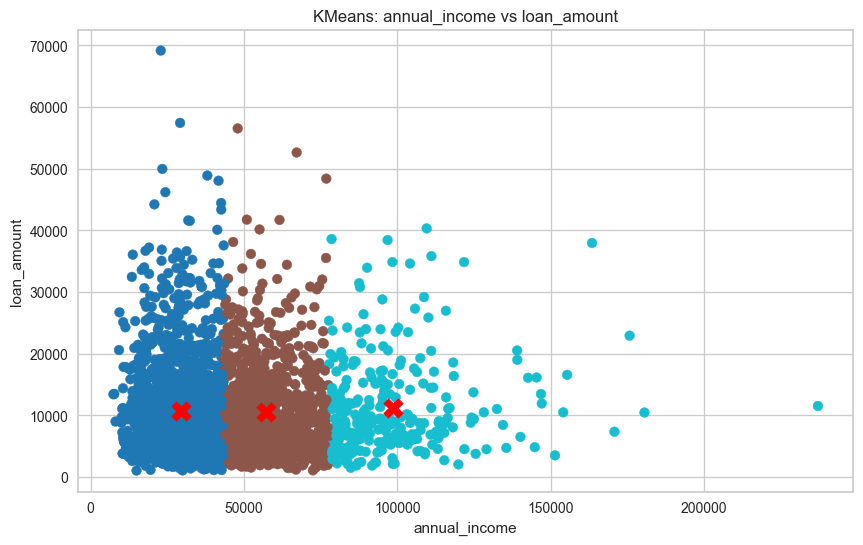

In [41]:
X1 = bank_df[["annual_income", "loan_amount"]]

kmeans_add_1 = KMeans(n_clusters=3, random_state=0)
labels1 = kmeans_add_1.fit_predict(X1)
centers1 = kmeans_add_1.cluster_centers_

plt.figure(figsize=(10,6))
plt.scatter(X1["annual_income"], X1["loan_amount"], c=labels1, cmap='tab10')
plt.scatter(centers1[:,0], centers1[:,1], marker="X", s=200, color='red')
plt.xlabel("annual_income")
plt.ylabel("loan_amount")
plt.title("KMeans: annual_income vs loan_amount")
plt.show()

Анализ...

Для второго `scatter` графика выбраны признаки `credit_score` (*Кредитный скор*) и `interest_rate_pct` (*Процентная ставка*).

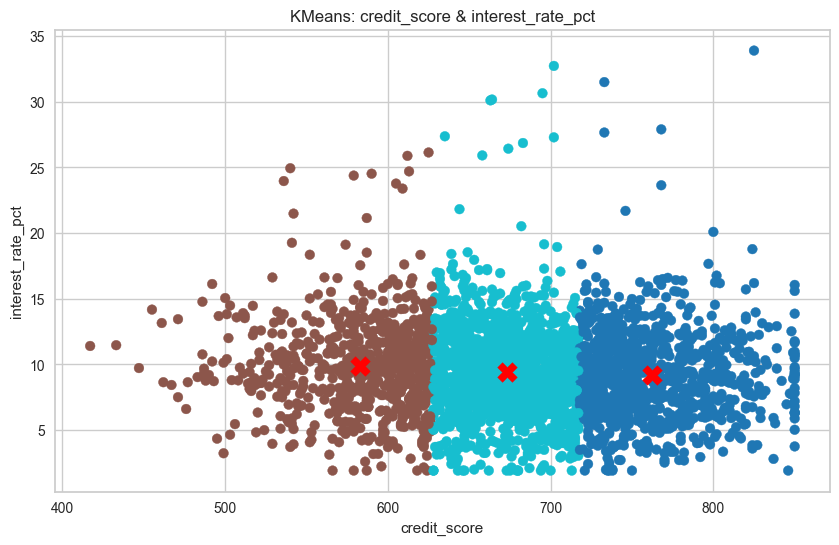

In [42]:
X2 = bank_df[["credit_score", "interest_rate_pct"]]

kmeans_add_2 = KMeans(n_clusters=3, random_state=0)
labels2 = kmeans_add_2.fit_predict(X2)
centers2 = kmeans_add_2.cluster_centers_

plt.figure(figsize=(10,6))
plt.scatter(X2["credit_score"], X2["interest_rate_pct"], c=labels2, cmap='tab10')
plt.scatter(centers2[:,0], centers2[:,1], marker="X", s=200, color='red')
plt.xlabel("credit_score")
plt.ylabel("interest_rate_pct")
plt.title("KMeans: credit_score & interest_rate_pct")
plt.show()

Анализ...

### №10

*Текст задания*:
> Выполнить кластеризацию с помощью метода `DBSCAN`. Добавить описание метода (теор. часть). Сравнить результаты с полученными ранее.

*Теоретическая часть:*

`DBSCAN` — это алгоритм кластеризации, основанный на идее плотности. Он находит области сгущения точек, разделённые пустотами, без необходимости заранее задавать число кластеров.

В основе метода — два параметра: радиус `eps` и минимальное число соседей `min_samples`. Если в окрестности радиуса eps точки достаточно соседей, она становится «ядром» и начинает формировать кластер. Алгоритм расширяет кластер, присоединяя все достижимые точки из окрестностей ядер, что позволяет находить кластеры произвольной, даже сложной формы.

Точки, не попавшие ни в одну окрестность, считаются шумом. Это делает `DBSCAN` полезным для обнаружения выбросов. Однако метод чувствителен к настройкам и требует масштабирования данных.

`DBSCAN` хорошо работает, когда кластеры имеют неравномерную плотность и форму, а выделение аномалий важно для задачи. Он широко применяется в анализе геоданных, сегментации и поиске аномалий.

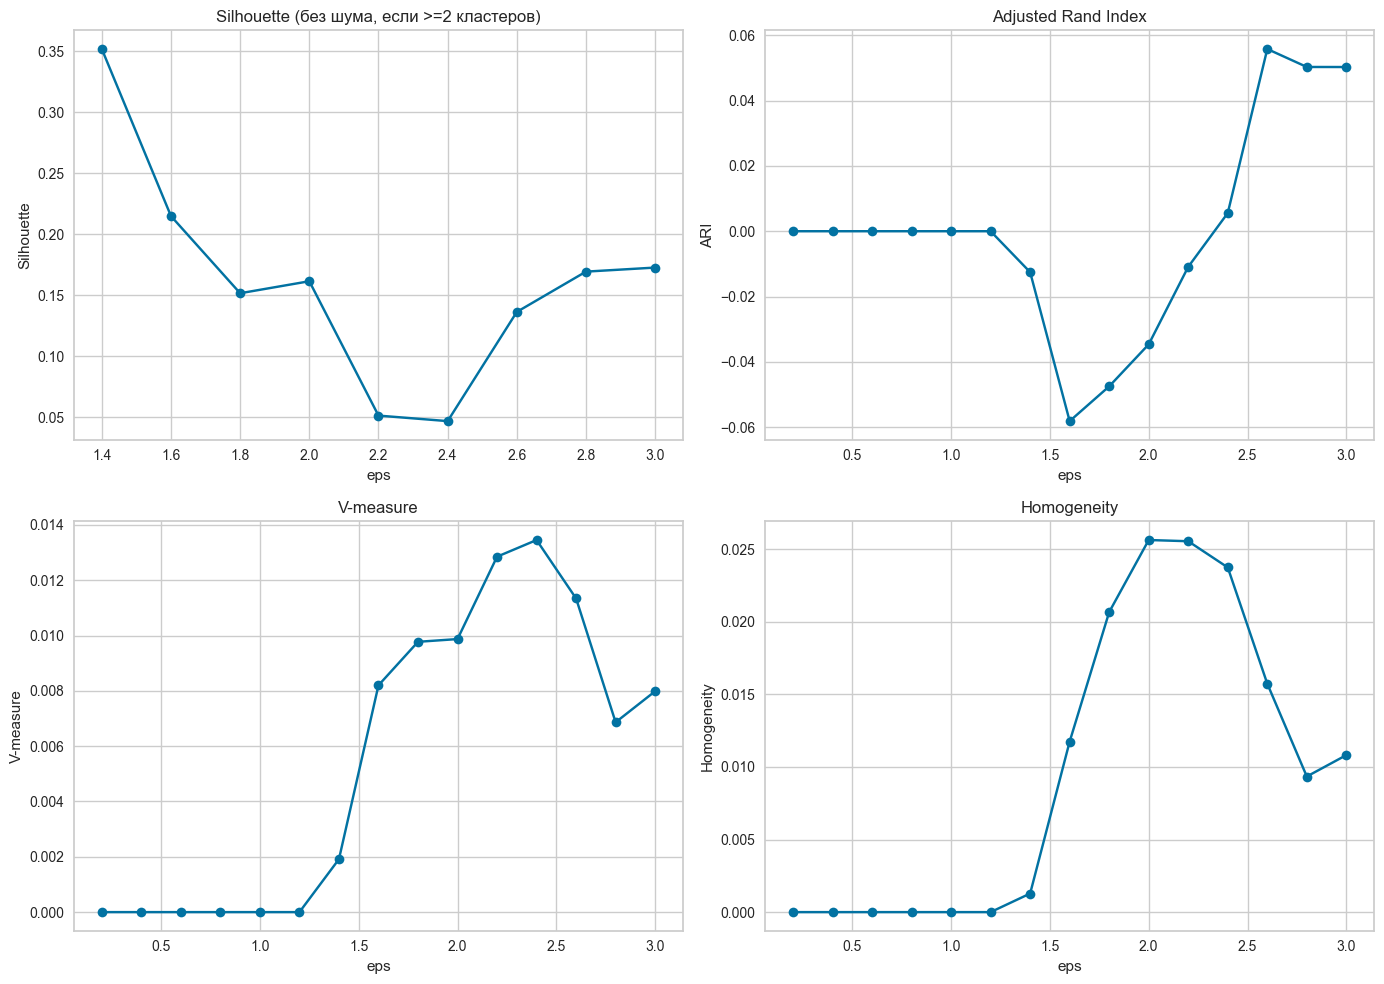

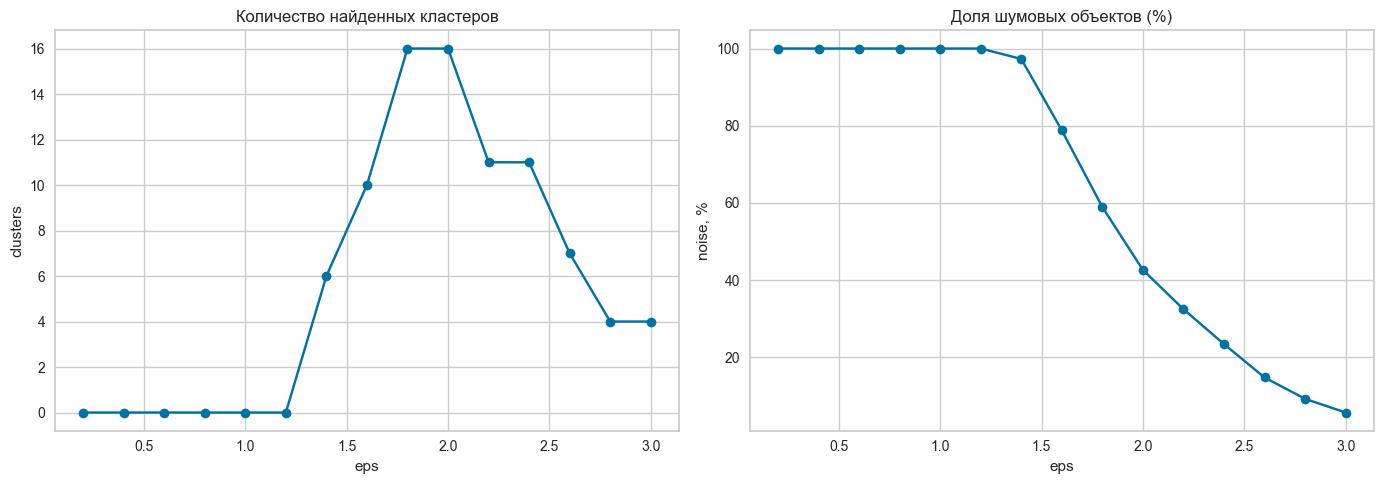

Выбранный eps: 1.40, min_samples=10
Кластеры: 6, шум: 2959 (97.3%)
Silhouette (без шума): 0.3518
ARI: -0.0125
V-measure: 0.0019
Homogeneity: 0.0013


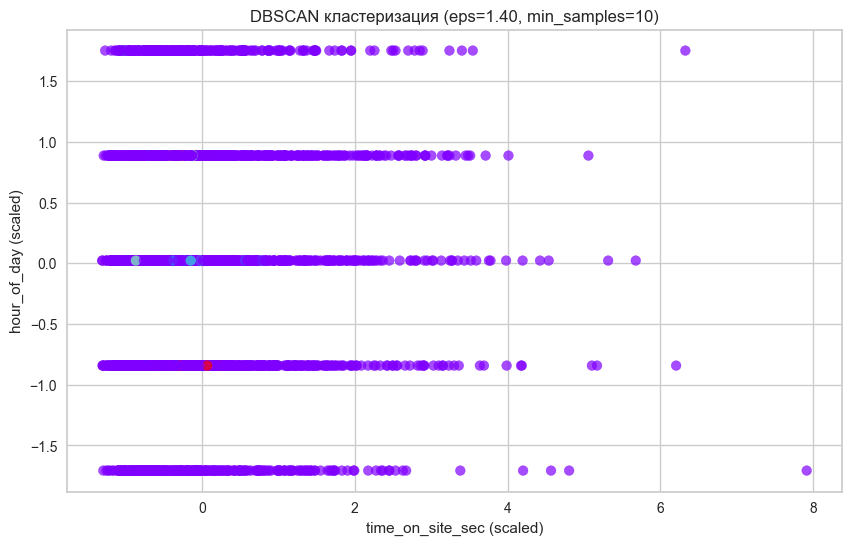

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn import metrics

_df = bank_df.select_dtypes(exclude=['object']).drop('default', axis=1)
true = bank_df['default'].values 

scaled = x_bank_scaled

eps_grid = np.arange(0.2, 3.1, 0.2)  
min_samples = 10
N = scaled.shape[0]

silhouette_arr = []
ari_arr = []
vms_arr = []
hom_arr = []
clusters_arr = []
noise_arr = []

for eps in eps_grid:
    labels = DBSCAN(eps=eps, min_samples=min_samples).fit_predict(scaled)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = np.sum(labels == -1)

    clusters_arr.append(n_clusters)
    noise_arr.append(n_noise)


    mask = labels != -1
    labels_in = labels[mask]

    if n_clusters >= 2 and mask.sum() > 1 and len(set(labels_in)) >= 2:
        sil = silhouette_score(scaled[mask], labels_in)
    else:
        sil = np.nan
    silhouette_arr.append(sil)


    ari_arr.append(metrics.adjusted_rand_score(true, labels))
    vms_arr.append(metrics.v_measure_score(true, labels))
    hom_arr.append(metrics.homogeneity_score(true, labels))


fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].plot(eps_grid, silhouette_arr, marker='o')
axes[0, 0].title('Silhouette (без шума, если >=2 кластеров)')
axes[0, 0].xlabel('eps')
axes[0, 0].ylabel('Silhouette')
axes[0, 0].grid(True)

axes[0, 1].plot(eps_grid, ari_arr, marker='o')
axes[0, 1].title('Adjusted Rand Index')
axes[0, 1].xlabel('eps')
axes[0, 1].ylabel('ARI')
axes[0, 1].grid(True)

axes[0, 0].plot(eps_grid, vms_arr, marker='o')
axes[0, 0].title('V-measure')
axes[0, 0].xlabel('eps')
axes[0, 0].ylabel('V-measure')
axes[0, 0].grid(True)

axes[0, 0].plot(eps_grid, hom_arr, marker='o')
axes[0, 0].title('Homogeneity')
axes[0, 0].xlabel('eps')
axes[0, 0].ylabel('Homogeneity')
axes[0, 0].grid(True)

plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(eps_grid, clusters_arr, marker='o')
plt.title('Количество найденных кластеров')
plt.xlabel('eps')
plt.ylabel('clusters')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(eps_grid, np.array(noise_arr) / N * 100, marker='o')
plt.title('Доля шумовых объектов (%)')
plt.xlabel('eps')
plt.ylabel('noise, %')
plt.grid(True)

plt.tight_layout()
plt.show()

valid_idx = np.where(~np.isnan(silhouette_arr))[0]
if len(valid_idx) > 0:
    best_idx = valid_idx[np.nanargmax(np.array(silhouette_arr)[valid_idx])]
    best_eps = eps_grid[best_idx]
else:

    best_idx = int(np.argmax(clusters_arr))
    best_eps = eps_grid[best_idx]

print(f"Выбранный eps: {best_eps:.2f}, min_samples={min_samples}")

dbscan_best = DBSCAN(eps=best_eps, min_samples=min_samples)
labels_best = dbscan_best.fit_predict(scaled)

n_clusters_best = len(set(labels_best)) - (1 if -1 in labels_best else 0)
n_noise_best = np.sum(labels_best == -1)
print(f"Кластеры: {n_clusters_best}, шум: {n_noise_best} ({n_noise_best/N*100:.1f}%)")


mask = labels_best != -1
labels_in = labels_best[mask]
if n_clusters_best >= 2 and mask.sum() > 1 and len(set(labels_in)) >= 2:
    sil_best = silhouette_score(scaled[mask], labels_in)
    print(f"Silhouette (без шума): {sil_best:.4f}")
else:
    print("Silhouette не вычисляется (менее 2 кластеров после удаления шума)")

print(f"ARI: {metrics.adjusted_rand_score(true, labels_best):.4f}")
print(f"V-measure: {metrics.v_measure_score(true, labels_best):.4f}")
print(f"Homogeneity: {metrics.homogeneity_score(true, labels_best):.4f}")


plt.figure(figsize=(10, 6))
plt.scatter(scaled[:, 2], scaled[:, 4], c=labels_best, cmap='rainbow', alpha=0.7)
plt.title(f'DBSCAN кластеризация (eps={best_eps:.2f}, min_samples={min_samples})')
plt.xlabel('time_on_site_sec (scaled)')
plt.ylabel('hour_of_day (scaled)')
plt.grid(True)
plt.show()

По постреонному графику видно, что резкий рост наблюдается при значении 

Анализ...